In [14]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

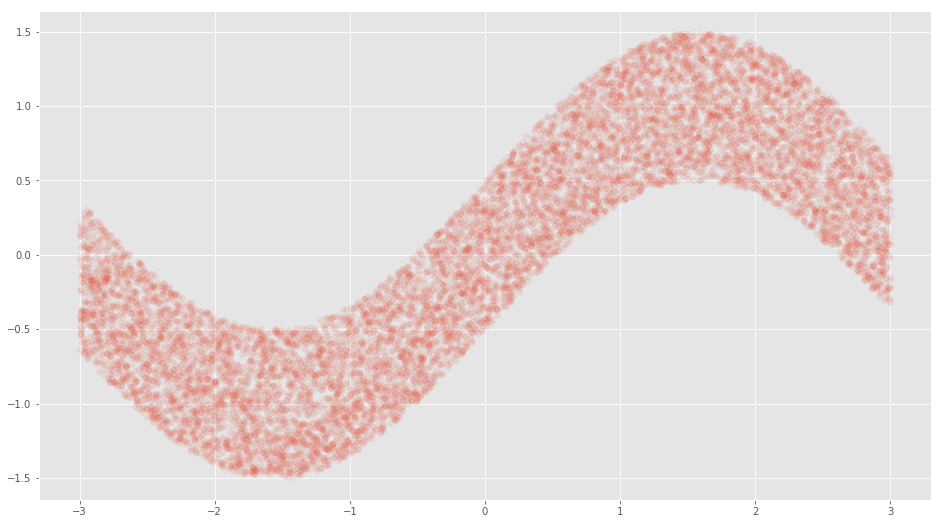

In [15]:
n = 10000
xs = np.linspace(-3, 3, n)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n)
plt.scatter(xs, ys, alpha = 0.1);

In [17]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

W = tf.Variable(
    tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'W')
b = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'b')
preds = X * W + b

In [18]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [21]:
# cost = distance(preds, tf.sin(X)) # approximated by
cost = distance(preds, Y)